In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sentiment_df=pd.read_csv("/content/fear_greed_index (1).csv")
trades_df =pd.read_csv("/content/historical_data (1).csv")

In [9]:
trades_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
sentiment_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [12]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

In [13]:
trades_df['date'] = trades_df['Timestamp IST'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])

In [14]:
sentiment_df.dropna(subset=['date'], inplace=True)
trades_df.dropna(subset=['date'], inplace=True)

In [15]:
print("\nData Preprocessing Complete.")
print("Trading Data Head:")
print(trades_df.head())
print("\nSentiment Data Head:")
print(sentiment_df.head())


Data Preprocessing Complete.
Trading Data Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                              

In [16]:
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='left')

In [17]:
merged_df.dropna(subset=['classification'], inplace=True)

In [18]:
print("\nDatasets Merged Successfully.")
print("Merged Data Head:")
print(merged_df.head())


Datasets Merged Successfully.
Merged Data Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                              

In [19]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

/tmp/ipython-input-2973072231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='viridis', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])


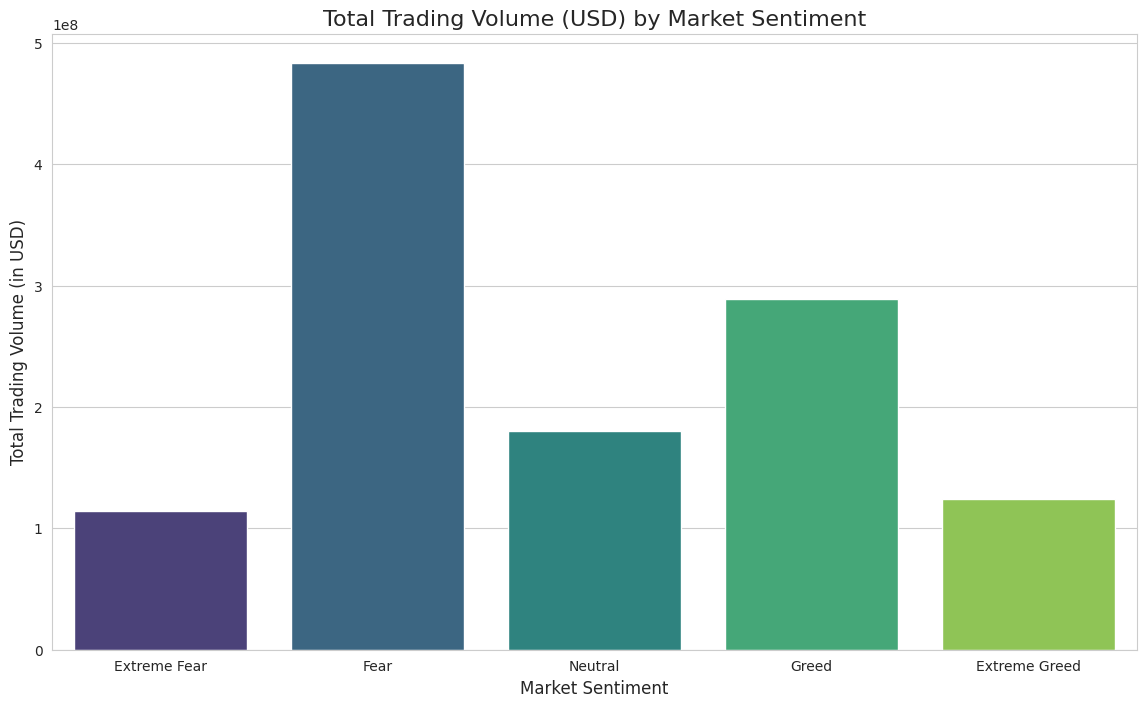

In [27]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().reset_index()
plt.figure()
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='viridis', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Total Trading Volume (USD) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Total Trading Volume (in USD)', fontsize=12)
plt.show()

/tmp/ipython-input-630493358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])


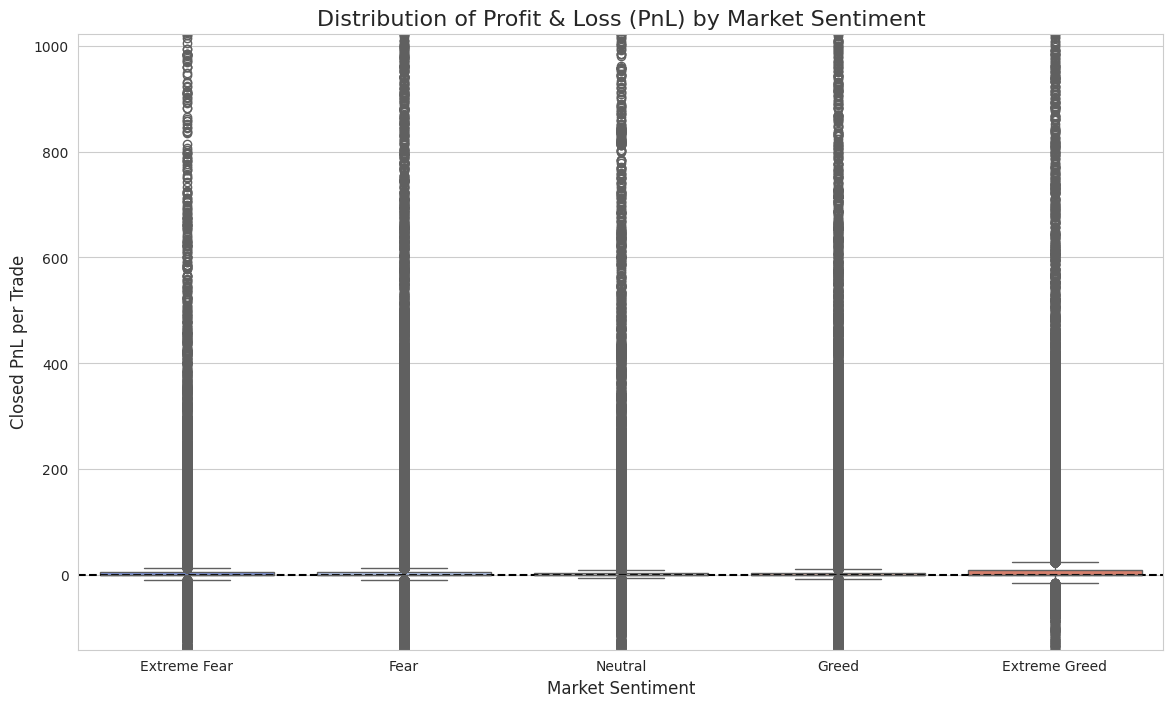

In [23]:
plt.figure()
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Profit & Loss (PnL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed PnL per Trade', fontsize=12)
plt.ylim(merged_df['Closed PnL'].quantile(0.01), merged_df['Closed PnL'].quantile(0.99)) # Zoom in by removing outliers for better visualization
plt.axhline(0, color='black', linestyle='--')
plt.show()

/tmp/ipython-input-2427139382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_by_sentiment, x='classification', y='NumberOfTrades', palette='plasma', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])


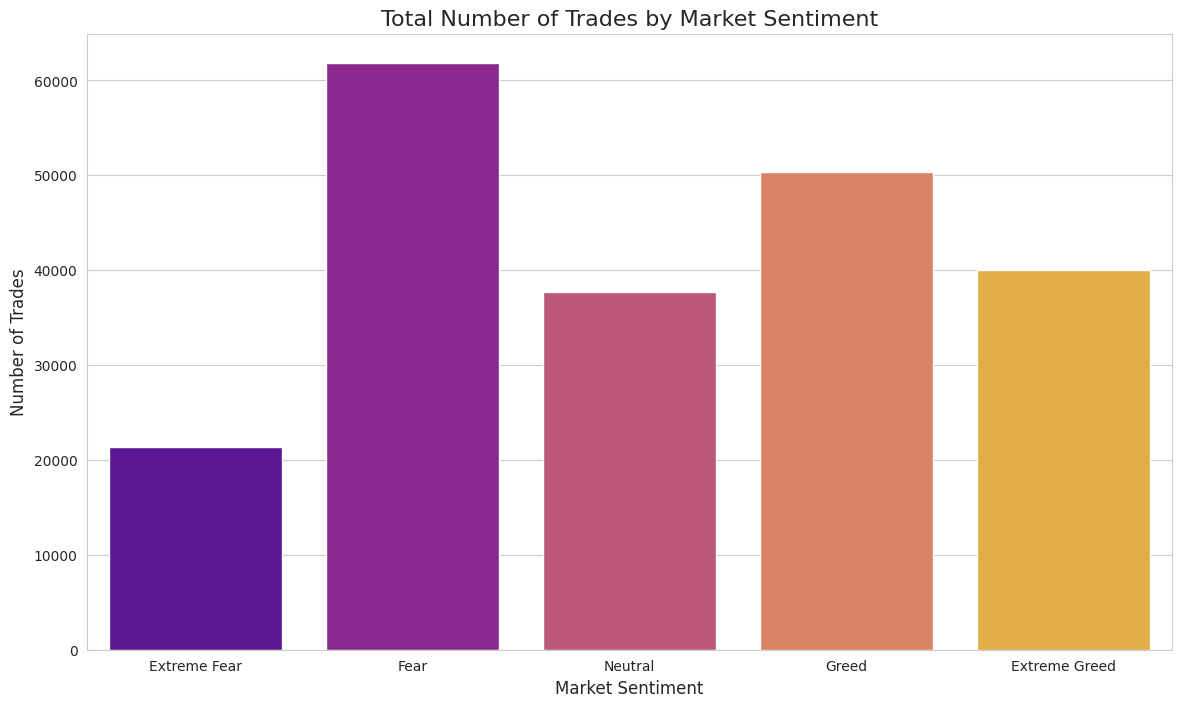

In [26]:
activity_by_sentiment = merged_df.groupby('classification')['Trade ID'].count().reset_index().rename(columns={'Trade ID': 'NumberOfTrades'})
plt.figure()
sns.barplot(data=activity_by_sentiment, x='classification', y='NumberOfTrades', palette='plasma', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Total Number of Trades by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.show()

Analyzing Buy/Sell Behavior vs. Market Sentiment


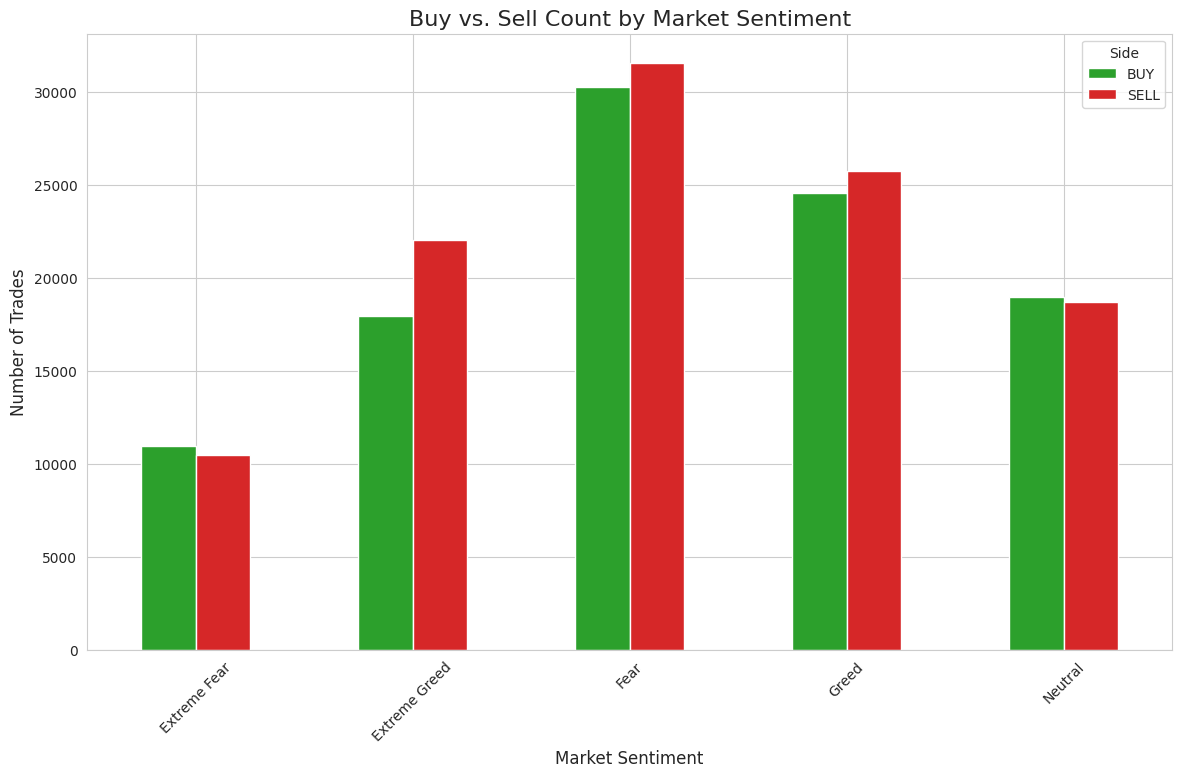

In [28]:
print("Analyzing Buy/Sell Behavior vs. Market Sentiment")
buy_sell_df = merged_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
buy_sell_df.plot(kind='bar', stacked=False, color=['#2ca02c', '#d62728']) # Green for BUY, Red for SELL
plt.title('Buy vs. Sell Count by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.show()